Import Libraries

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

Input Data

In [61]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [62]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


EXPLORATORY DATA ANALYSIS


*   Data Quality
*  Handling Duplicates



In [63]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [64]:
df = df.drop_duplicates()

Uniqueness

In [65]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [88]:
# Get the unique values in the 'gender' column
distinct_genders = df['gender'].unique()

# Print the distinct values
print("Distinct values in the 'gender' column:")
print(distinct_genders)

Distinct values in the 'gender' column:
['Female' 'Male']


Missing Values

In [66]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [67]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

Describe the Data

In [68]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


Univariate Analysis

Histogram for age

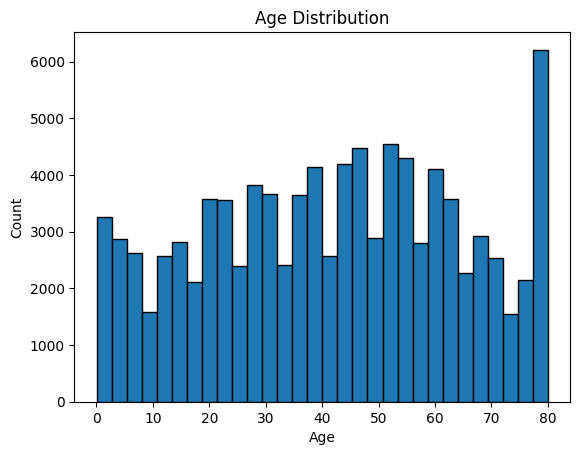

In [69]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Bar plot for gender

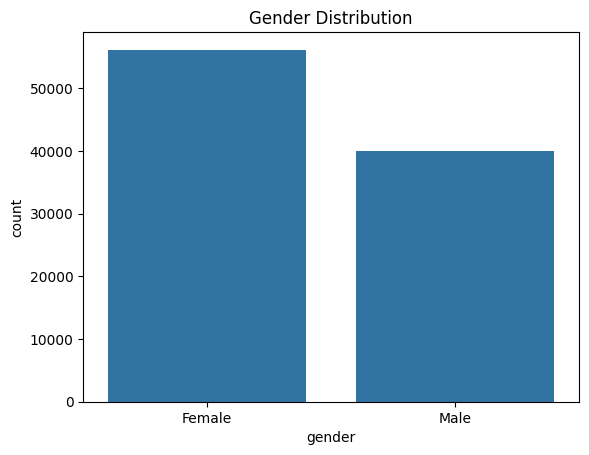

In [70]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

Distribution for BMI

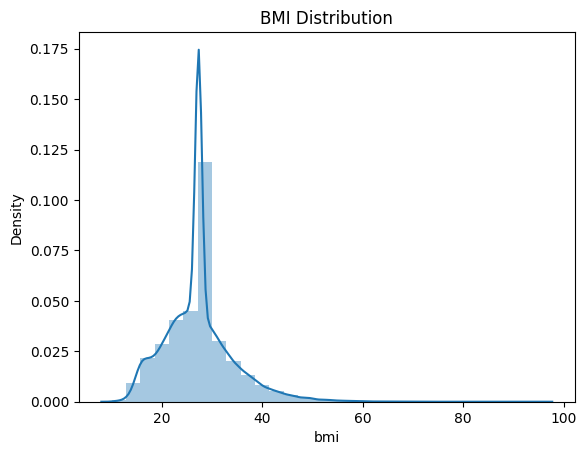

In [71]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

Count plots for binary variables

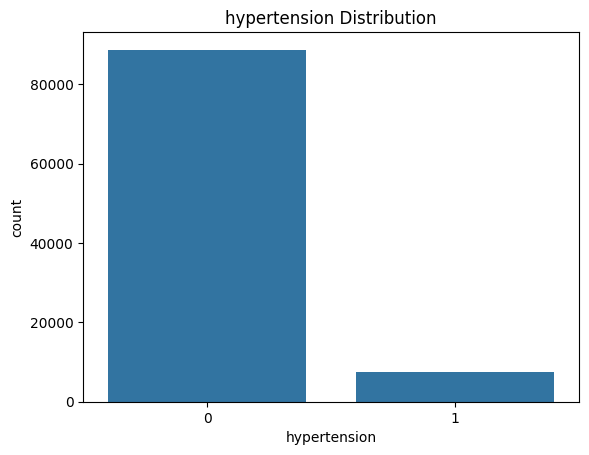

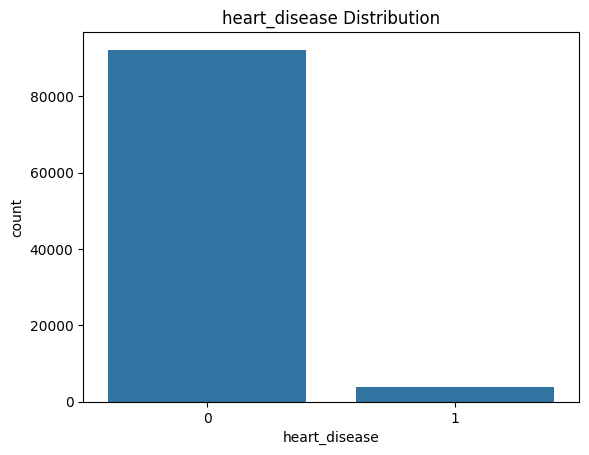

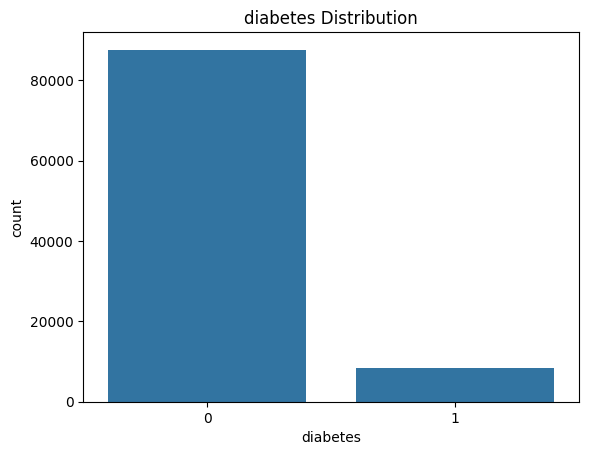

In [72]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

Count plot for smoking history

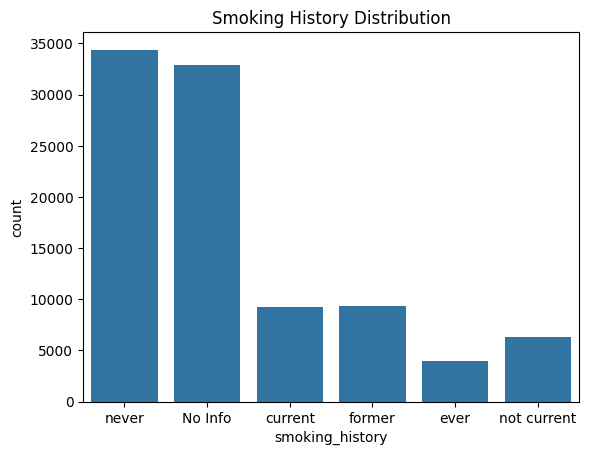

In [73]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

Bivariative Analysis
Boxplot BMI vs Diabetes classification

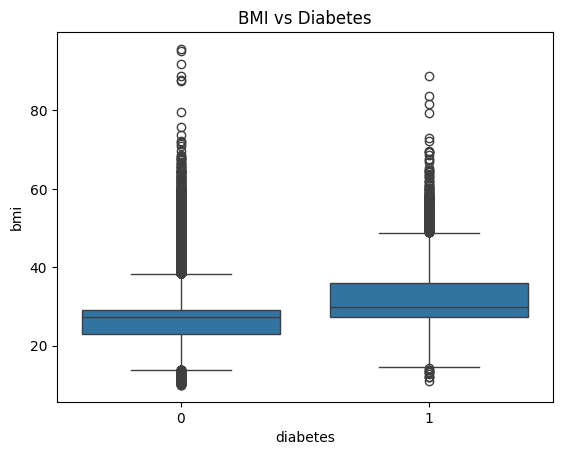

In [74]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

Boxplot Age vs Diabetes Classification

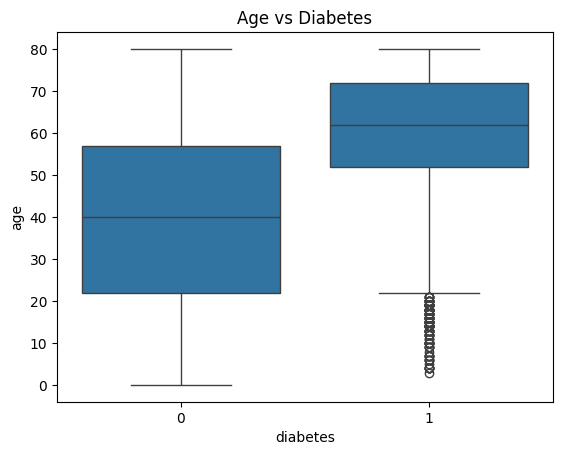

In [75]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

Count plot of gender vs diabetes

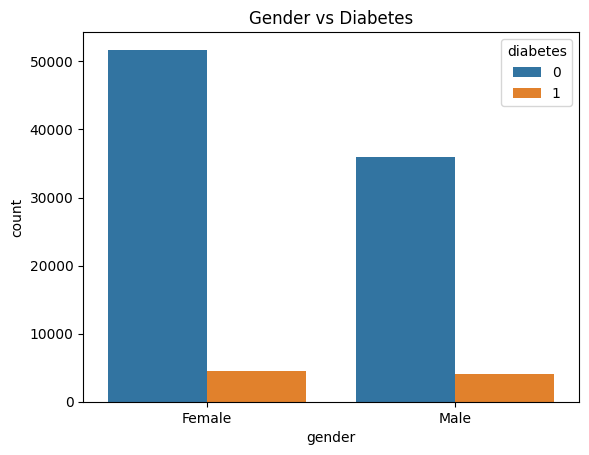

In [76]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

Boxplot HbA1c level vs Diabetes classification

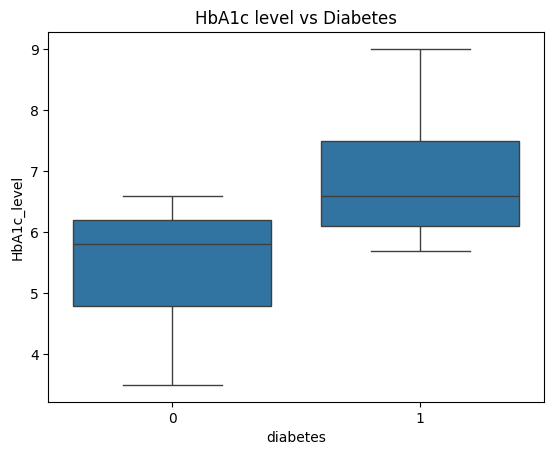

In [77]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

### <b>IV <span style='color:#16C2D5'>|</span> Boxplot blood glucose level vs Diabetes classification</b>

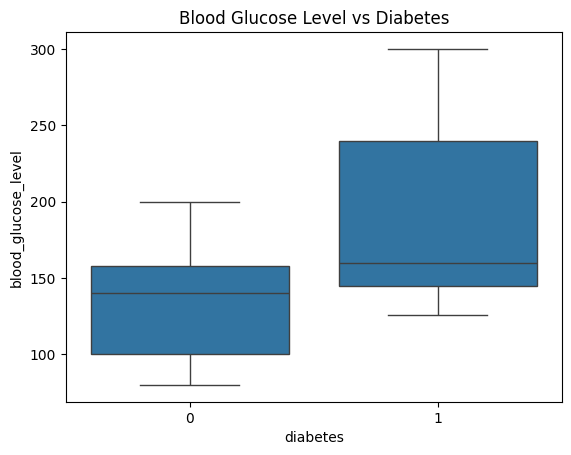

In [78]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

Multivariate analysis
I | Scatterplot Age vs BMI colored by Diabetes classification

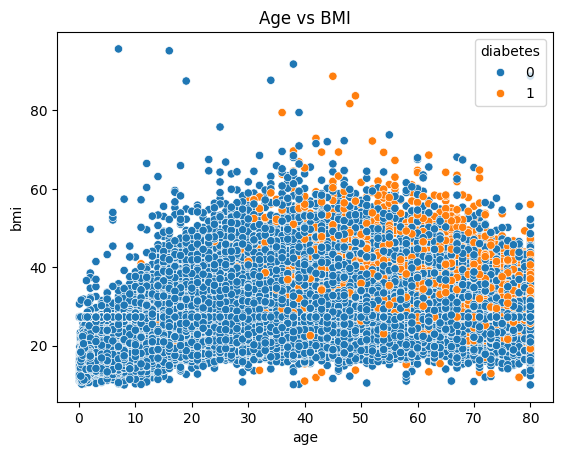

In [79]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

Violin plot of BMI against diabetes classification split by gender

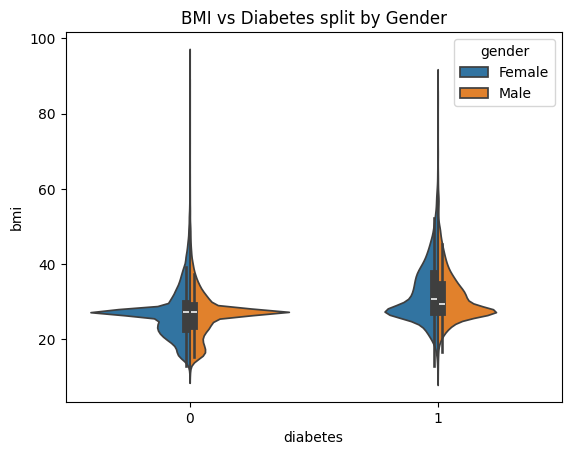

In [80]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

Interaction between gender, BMI and diabetes

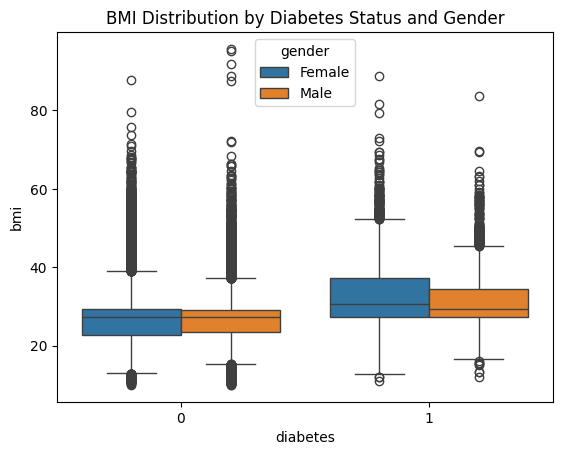

In [81]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

Interaction between gender, Age and diabetes

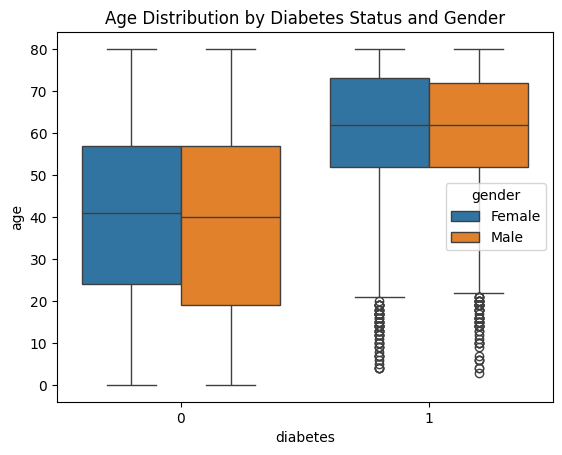

In [82]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

CORRELATION
Data Preparation


In [83]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current_smoker'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker        67276
past_smoker       19655
current_smoker     9197
Name: count, dtype: int64


In [84]:
data = df.copy()

Encoding

In [85]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

Correlation Matrix

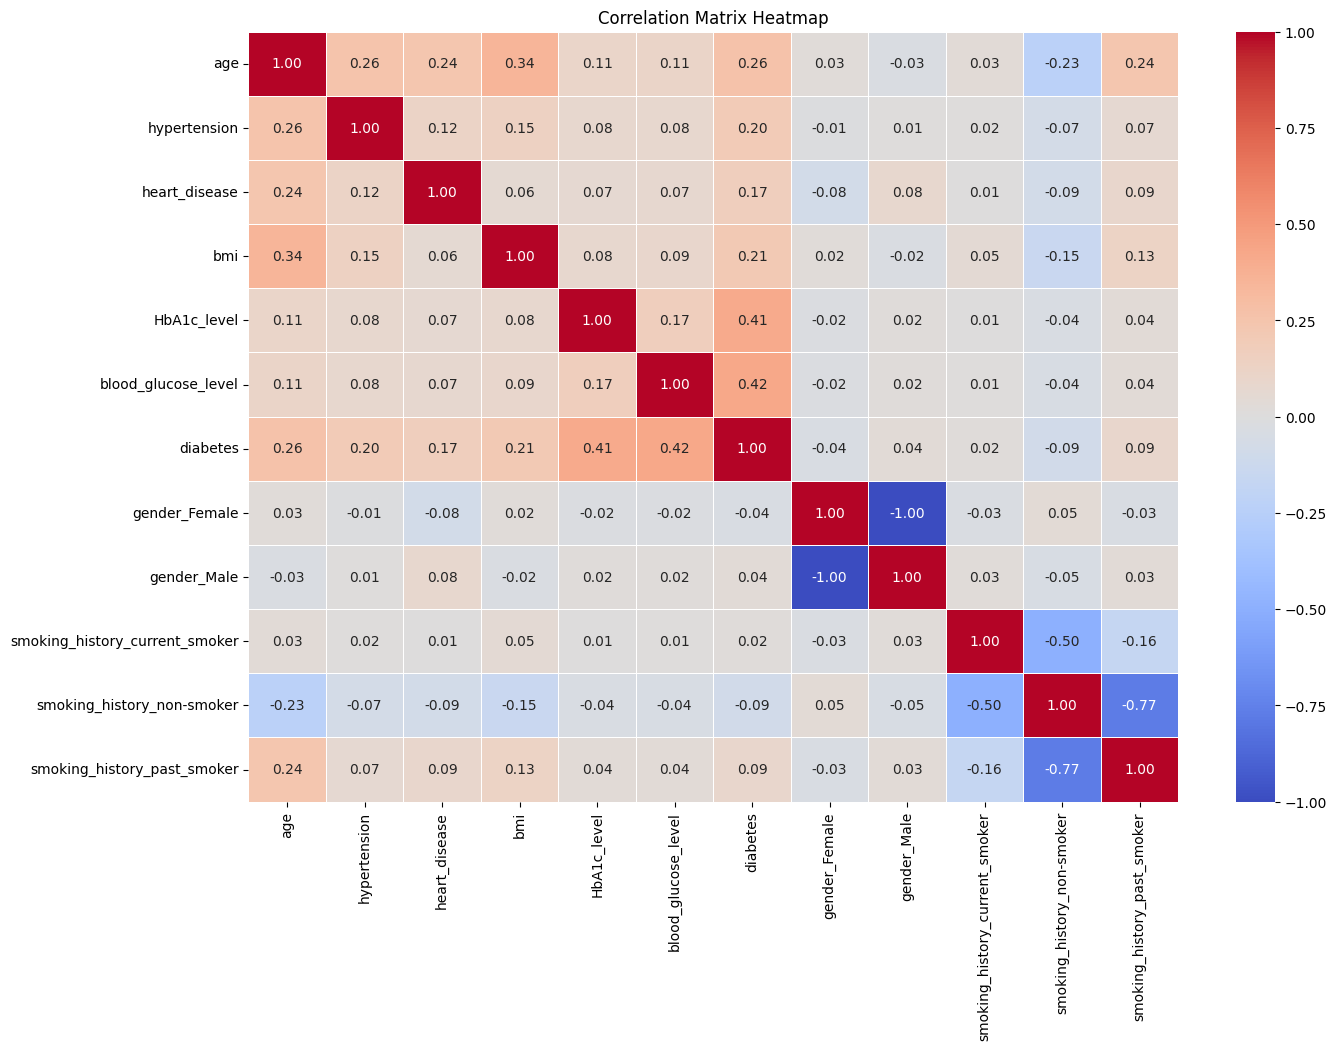

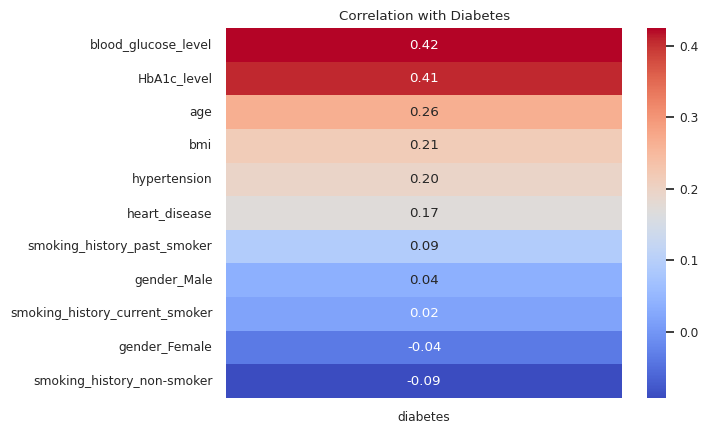

In [86]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Data Preprocessing

In [87]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

Tain test Split and Stratified K fold validation

In [93]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Assuming df is your DataFrame and it has been loaded and preprocessed
# Define preprocessor (as you have in your notebook)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Apply the preprocessor to your data
X_processed = preprocessor.fit_transform(X)

# Set up Stratified K-Fold cross-validator (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the folds
print("Stratified K-Fold splits:")
for fold, (train_index, test_index) in enumerate(skf.split(X_processed, y)):
    X_train_fold, X_test_fold = X_processed[train_index], X_processed[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold + 1}:")
    print(f"  Training set shape: {X_train_fold.shape}, {y_train_fold.shape}")
    print(f"  Testing set shape: {X_test_fold.shape}, {y_test_fold.shape}")
    print("-" * 20)

Stratified K-Fold splits:
Fold 1:
  Training set shape: (76902, 11), (76902,)
  Testing set shape: (19226, 11), (19226,)
--------------------
Fold 2:
  Training set shape: (76902, 11), (76902,)
  Testing set shape: (19226, 11), (19226,)
--------------------
Fold 3:
  Training set shape: (76902, 11), (76902,)
  Testing set shape: (19226, 11), (19226,)
--------------------
Fold 4:
  Training set shape: (76903, 11), (76903,)
  Testing set shape: (19225, 11), (19225,)
--------------------
Fold 5:
  Training set shape: (76903, 11), (76903,)
  Testing set shape: (19225, 11), (19225,)
--------------------


Feature Selection
*   Chi-Square Test for Categorical Features
*   Pearson's Correlation for Numerical Features



In [95]:
from sklearn.feature_selection import chi2, SelectKBest
from scipy.stats import pearsonr

# Make sure 'data' is the DataFrame you want to perform feature selection on.

# Separate features (X) and target (y)
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())


# Select categorical features that are already encoded in 'data'
encoded_categorical_cols = [col for col in X.columns if 'gender_' in col or 'smoking_history_' in col]
print("Encoded categorical columns for Chi-Square:", encoded_categorical_cols)

if encoded_categorical_cols:
    X_categorical = X[encoded_categorical_cols]

    # Apply Chi-Square test
    chi2_scores, p_values_chi2 = chi2(X_categorical, y)

    # Create a DataFrame to display Chi-Square results
    chi2_results = pd.DataFrame({'feature': encoded_categorical_cols,
                                 'chi2_score': chi2_scores,
                                 'p_value': p_values_chi2})

    print("\nChi-Square Test Results (Categorical Features):")
    print(chi2_results.sort_values(by='chi2_score', ascending=False))
else:
    print("\nNo encoded categorical columns found for Chi-Square test.")

# --- Feature Selection for Numerical Features (Pearson's Correlation) ---

print("\nPearson's Correlation Results (Numerical Features):")
numerical_correlation_results = []
for col in numerical_cols:
    # Calculate Pearson's correlation coefficient and p-value
    correlation, p_value_pearson = pearsonr(X[col], y)
    numerical_correlation_results.append({'feature': col,
                                          'pearson_correlation': correlation,
                                          'p_value': p_value_pearson})

# Create a DataFrame to display Pearson's correlation results
pearson_results = pd.DataFrame(numerical_correlation_results)

# Sort by absolute correlation value in descending order
pearson_results['abs_correlation'] = abs(pearson_results['pearson_correlation'])
print(pearson_results.sort_values(by='abs_correlation', ascending=False))

Categorical columns: []
Numerical columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Encoded categorical columns for Chi-Square: ['gender_Female', 'gender_Male', 'smoking_history_current_smoker', 'smoking_history_non-smoker', 'smoking_history_past_smoker']

Chi-Square Test Results (Categorical Features):
                          feature  chi2_score  p_value
4     smoking_history_past_smoker      655.01     0.00
3      smoking_history_non-smoker      246.13     0.00
1                     gender_Male       80.40     0.00
0                   gender_Female       57.22     0.00
2  smoking_history_current_smoker       25.18     0.00

Pearson's Correlation Results (Numerical Features):
               feature  pearson_correlation  p_value  abs_correlation
5  blood_glucose_level                 0.42     0.00             0.42
4          HbA1c_level                 0.41     0.00             0.41
0                  age                 0.26     0.00     

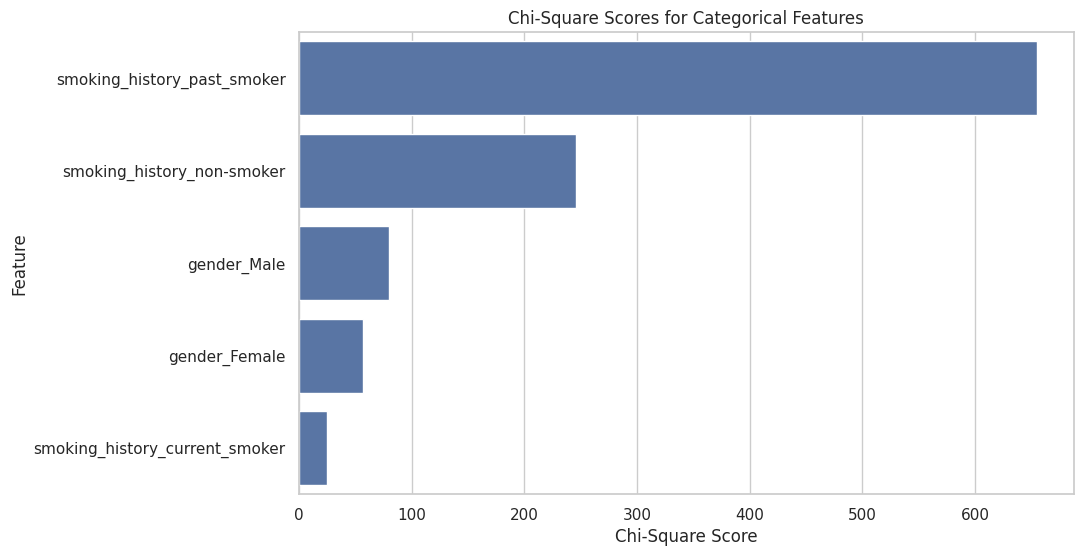

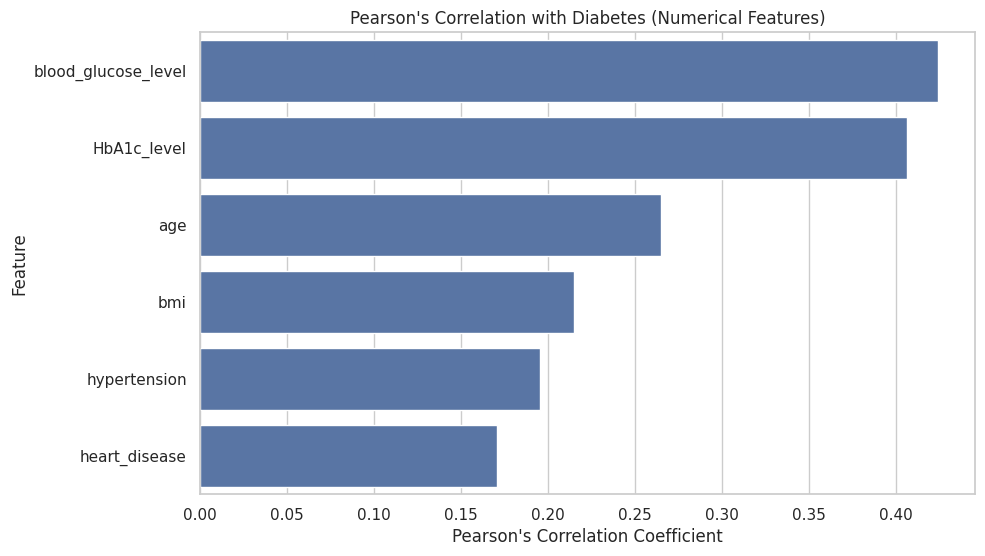

In [97]:

# --- Visualization for Chi-Square Results (Categorical Features) ---
if not chi2_results.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='chi2_score', y='feature', data=chi2_results.sort_values(by='chi2_score', ascending=False))
    plt.title('Chi-Square Scores for Categorical Features')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.show()

else:
    print("No Chi-Square results to visualize.")

# --- Visualization for Pearson's Correlation Results (Numerical Features) ---
if not pearson_results.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='pearson_correlation', y='feature', data=pearson_results.sort_values(by='abs_correlation', ascending=False))
    plt.title('Pearson\'s Correlation with Diabetes (Numerical Features)')
    plt.xlabel('Pearson\'s Correlation Coefficient')
    plt.ylabel('Feature')
    plt.show()

else:
    print("No Pearson's Correlation results to visualize.")